In [1]:
from lmfit.models import LinearModel, LorentzianModel
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from scipy import linalg as la
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
from scipy.signal import find_peaks
import random

In [18]:
class Lorent(object):
    def __init__(self, epoches, lr,Num):
        self.epoches=epoches
        self.lr=lr
        self.w1=self.w3=self.w5=random. random() * 0.9 + 0.1 
        self.w2=self.w4=self.w6=random. random() * 1.2 + 0.1 
        self.Num=Num
    def residuals(self,x_ori,x_new,rang,Num,num):
        if num==1:
            return sum((x_new[rang[0]-Num:rang[0]+Num]-x_ori[rang[0]-Num:rang[0]+Num]))
        elif num==2:
            return sum((x_new[rang[0]-Num:rang[0]+Num]-x_ori[rang[0]-Num:rang[0]+Num])), sum((x_new[rang[1]-Num:rang[1]+Num]-x_ori[rang[1]-Num:rang[1]+Num]))
        else:
            return sum((x_new[rang[0]-Num:rang[0]+Num]-x_ori[rang[0]-Num:rang[0]+Num])), sum((x_new[rang[1]-Num:rang[1]+Num]-x_ori[rang[1]-Num:rang[1]+Num])), sum((x_new[rang[2]-Num:rang[2]+Num]-x_ori[rang[2]-Num:rang[2]+Num]))
            
    def D(self,df):
        df=pd.read_table(df)[450:600]
        df.columns=['energyloss','intensity']
        x=df['energyloss'].values
        y=df['intensity'].values
        return x,y
    def L1(self,x_array,amp1,W1,C1,w1,w2):
        W1=W1*w1
        amp1=amp1*w2
        return amp1*W1**2/((x_array-C1)**2+W1**2)
    def L2(self,x_array,amp1,W1,C1,w1,w2,amp2,W2,C2,w3,w4):
        W1=W1*w1
        amp1=amp1*w2
        W2=W2*w3
        amp2=amp2*w4
        return amp1*W1**2/((x_array-C1)**2+W1**2)+amp2*W2**2/((x_array-C2)**2+W2**2)
    def L3(self,x_array,amp1,W1,C1,w1,w2,amp2,W2,C2,w3,w4,amp3,W3,C3,w5,w6):
        W1=W1*w1
        amp1=amp1*w2
        W2=W2*w3
        amp2=amp2*w4
        W3=W3*w5
        amp3=amp3*w6
        return amp1*W1**2/((x_array-C1)**2+W1**2)+amp2*W2**2/((x_array-C2)**2+W2**2)+amp3*W3**2/((x_array-C3)**2+W3**2)
    def DnumberP(self,df):
        x,y=self.D(df)
        peaks,_=find_peaks(y,distance=10)
        To=0
        Nps=[]
        for peak in peaks:
            if peak>28 and peak<38:
                if y[peak]-y[peak-5]>0.0011 or y[peak]-y[peak-6]>0.0011 or y[peak]-y[peak-4]>0.0011:
                    To+=1
                    Nps.append(peak)
            elif peak>72 and peak<92:
                if y[peak]-y[peak-5]>0.0011 or y[peak]-y[peak-6]>0.0011 or y[peak]-y[peak-4]>0.0011:
                    To+=1
                    Nps.append(peak)
            elif peak>92 and peak<102:
                if y[peak]-y[peak-5]>0.0011 or y[peak]-y[peak-6]>0.0011 or y[peak]-y[peak-4]>0.0011:
                    To+=1
                    Nps.append(peak)
        width1=x[Nps[0]+self.Num]-x[Nps[0]-self.Num]
        print(Nps)
        if To==1:
            for i in range(self.epoches):
                new=self.L1(x,y[Nps[0]],width1,x[Nps[0]],self.w1,self.w2)
                res1=self.residuals(y,new,Nps,self.Num,1)
                self.w2=self.w1-self.lr*res1
                self.w1=self.w1-self.lr*res1
                if abs(res1)<0.00002:
                    fig= plt.figure(figsize=(6,4))
                    axes=fig.add_subplot(1,1,1)
                    plt.plot(x,new)
                    plt.plot(x,y)
                    plt.title(df[6:10]+'_'+df[11:12]+'_'+df[19:25])
                    print('Weight for FWHW of first peak is:'+str(self.w1))
                    print('Weight for amplitude of first peak is:'+str(self.w2))
                    print('The total Residual='+str((abs(res1))))
                    break
        elif To==2:
            width2=x[Nps[1]+self.Num]-x[Nps[1]-self.Num]
            for i in range(self.epoches):
                new=self.L2(x,y[Nps[0]],width1,x[Nps[0]],self.w1,self.w2,y[Nps[1]],width2,x[Nps[1]],self.w3,self.w4)
                res1,res2=self.residuals(y,new,Nps,self.Num,2)
                self.w2=self.w2-self.lr*res1
                self.w1=self.w1-self.lr*res1
                self.w3=self.w3-self.lr*res2
                self.w4=self.w4-self.lr*res2
                if abs(res1)+abs(res2)<0.00002:
                    fig= plt.figure(figsize=(6,4))
                    axes=fig.add_subplot(1,1,1)
                    plt.plot(x,new)
                    plt.title(df[6:10]+'_'+df[11:12]+'_'+df[19:25])
                    plt.plot(x,y)
                    print('Weight for FWHW of first peak is:'+str(self.w1))
                    print('Weight for amplitude of first peak is:'+str(self.w2))
                    print('Weight for FWHW of second peak is:'+str(self.w3))
                    print('Weight for amplitude of second peak is:'+str(self.w4))
                    print('The total Residual='+str((abs(res1)+abs(res2))))
                    break
        else:
            width2=x[Nps[1]+self.Num]-x[Nps[1]-self.Num]
            width3=x[Nps[2]+self.Num]-x[Nps[2]-self.Num]
            for i in range(self.epoches):
                new=self.L3(x,y[Nps[0]],width1,x[Nps[0]],self.w1,self.w2,y[Nps[1]],width2,x[Nps[1]],self.w3,self.w4,y[Nps[2]],width3,x[Nps[2]],self.w5,self.w6)
                res1,res2,res3=self.residuals(y,new,Nps,self.Num,3)
                self.w2=self.w2-self.lr*res1
                self.w1=self.w1-self.lr*res1
                self.w3=self.w3-self.lr*res2
                self.w4=self.w4-self.lr*res2
                self.w5=self.w5-self.lr*res3
                self.w6=self.w6-self.lr*res3
                if abs(res1)+abs(res2)+abs(res3)<0.00005:
                    fig= plt.figure(figsize=(6,4))
                    axes=fig.add_subplot(1,1,1)
                    plt.plot(x,new)
                    plt.plot(x,y)
                    plt.title(df[6:10]+'_'+df[11:12]+'_'+df[19:25])
                    print('Weight for FWHW of first peak is:'+str(self.w1))
                    print('Weight for amplitude of first peak is:'+str(self.w2))
                    print('Weight for FWHW of second peak is:'+str(self.w3))
                    print('Weight for amplitude of second peak is:'+str(self.w4))
                    print('Weight for FWHW of third peak is:'+str(self.w5))
                    print('Weight for amplitude of third peak is:'+str(self.w6))
                    print('The total Residual='+str((abs(res1)+abs(res2)+abs(res3))))
                    break            

[32, 75]
Weight for FWHW of first peak is:1.0248864532882394
Weight for amplitude of first peak is:0.6890679780251384
Weight for FWHW of second peak is:1.21117260113775
Weight for amplitude of second peak is:0.8753541258746479
The total Residual=1.956272583457548e-05
[33, 80, 90]
Weight for FWHW of first peak is:1.1136073457175621
Weight for amplitude of first peak is:0.7777888704544564
Weight for FWHW of second peak is:0.56743575010034
Weight for amplitude of second peak is:0.23161727483723832
Weight for FWHW of third peak is:1.1506218407664877
Weight for amplitude of third peak is:0.8148033655033852
The total Residual=4.9811402419499065e-05
[77, 90]
Weight for FWHW of first peak is:0.9262891035679095
Weight for amplitude of first peak is:0.5904706283048025
Weight for FWHW of second peak is:0.9503582854361621
Weight for amplitude of second peak is:0.6145398101730606
The total Residual=1.9954401592213455e-05
[31, 77]
Weight for FWHW of first peak is:1.0741402118142478
Weight for amplit

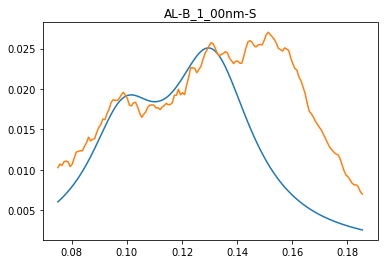

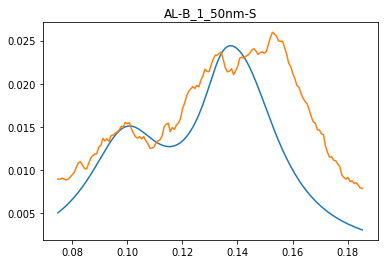

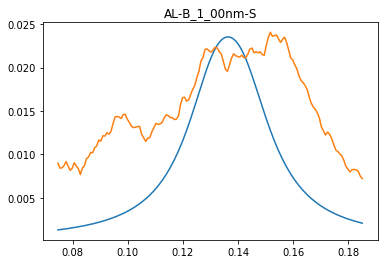

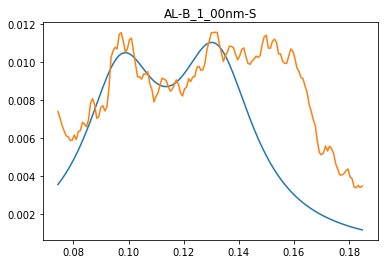

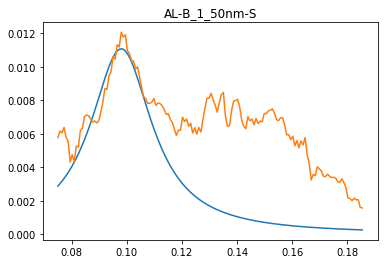

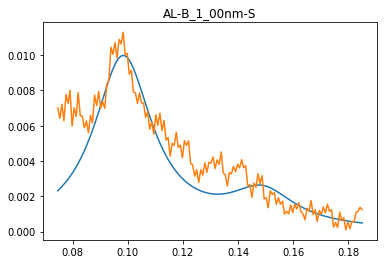

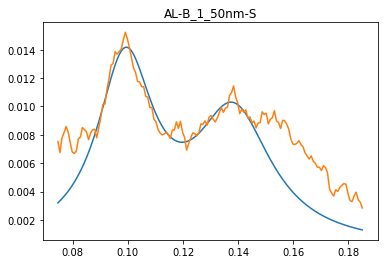

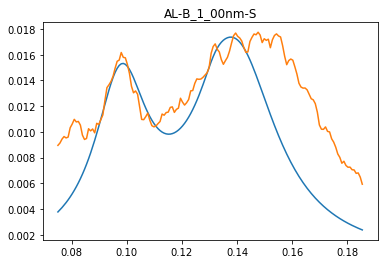

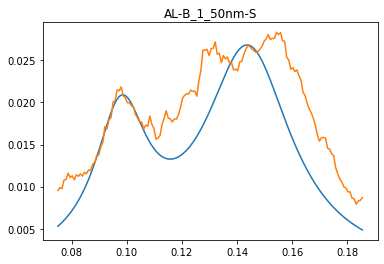

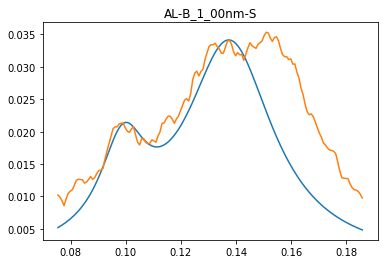

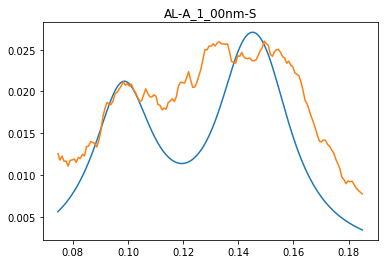

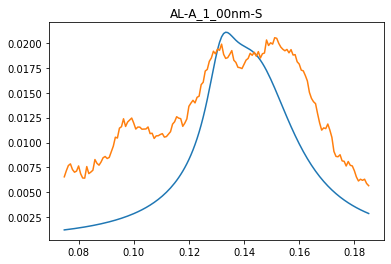

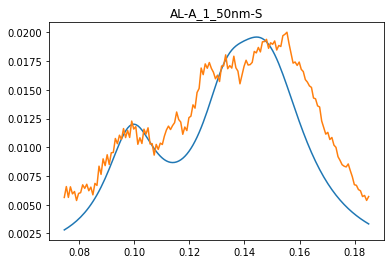

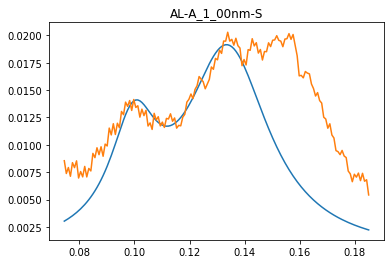

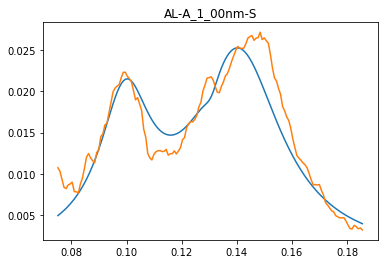

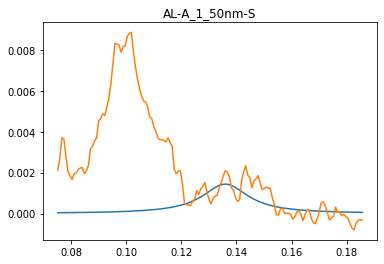

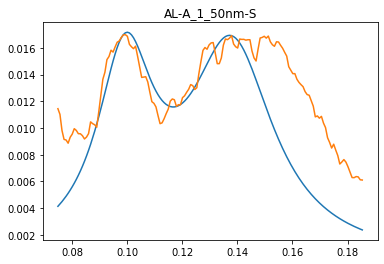

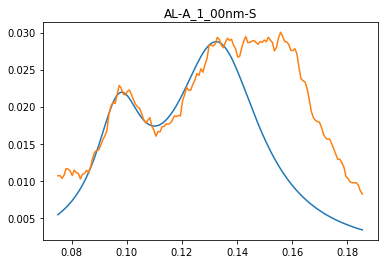

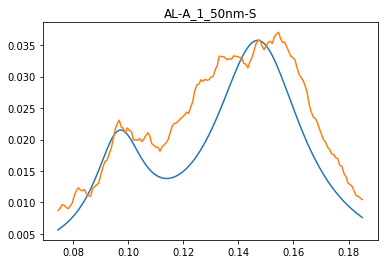

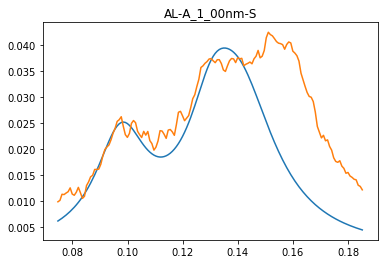

In [20]:
net=Lorent(2000,0.1,10)
number=['0000','0100','0250','0500']
for i in range(1000,3001,250):
    number.append(str(i))
'''number.append('3050')
number.append('3100')'''
for k in ['AL-B','AL-A']:
    for j in number:
        try:
            name='3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j)
            net.DnumberP(name)
        except Exception as e:
            pass